In [10]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np

In [11]:
rm = pyvisa.ResourceManager()
visa_list = rm.list_resources()
visa_list

('TCPIP0::TEKSCOPE-536165::inst0::INSTR',
 'TCPIP0::172.20.147.149::inst0::INSTR',
 'GPIB0::2::INSTR',
 'GPIB0::8::INSTR',
 'GPIB0::10::INSTR',
 'USB0::0x1313::0x8078::P0021527::0::INSTR')

In [12]:
#クエリ送信
inst_1 = visa_list[1]
scope = rm.open_resource(inst_1)
print(scope.query('*IDN?'))

TEKTRONIX,DPO7104C,C141123,CF:91.1CT FV:7.6.0 Build 7



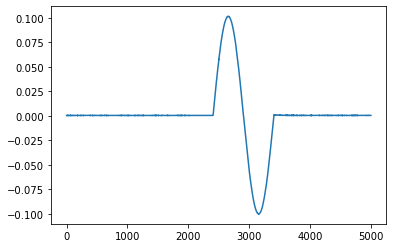

In [29]:
import numpy as np

# timeout の設定
scope.timeout = 30000 # 30 秒

# Setting source as Channel 1
scope.write('DATA:SOU CH1') 
scope.write('DATA:WIDTH 2') 
scope.write('DATA:ENC SRIBINARY')

scope.write('DATa:STARt 1')
scope.write('DATa:STOP 5000')
ymult = float(scope.query('WFMOUTPRE:YMULT?')) # y-axis least 
yzero = float(scope.query('WFMOUTPRE:YZERO?')) # y-axis zero error
yoff = float(scope.query('WFMOUTPRE:YOFF?'))   # y-axis offset
xincr = float(scope.query('WFMOUTPRE:XINCR?')) # x-axis least count
xoff = float(scope.query('WFMP:PT_OFF?'))   # x-axis offset


ADC_wave = scope.query_binary_values('CURVe?',datatype = 'h',is_big_endian=False, container=np.array)
Volts = (ADC_wave - yoff) * ymult + yzero
time = np.arange(-1*xincr*xoff,-1*xincr*xoff+len(Volts)*xincr,xincr)

# データ
plt.plot(Volts)

In [30]:
print(ymult)
print(yzero)
print(yoff)
print(xincr)
print(xoff)
print(xzero)
len(ADC_wave)

4.6875e-06
0.0
0.0
1e-09
2500.0
0.0


5000